# Visualisation – scatterplots

In [1]:
import pandas as pd
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn');

In [2]:
df = pd.read_csv("LGA_diabetes_profiles.csv")

In [3]:
ndss = ['LGA Name', 'LGA status', 'People registering type 2 diabetes with NDSS']
dhhs = ['LGA Name', 'LGA status', 'People reporting type 2 diabetes']
factor = { 'name'    : 'LGA Name',
           'status'  : 'LGA status',
           'dndss'   : 'People registering type 2 diabetes with NDSS',
           'ddhhs'   : 'People reporting type 2 diabetes',
           'facility': 'LGA sport and recreational facilities count', 
           'sport'   : 'People who are members of a sports group',
           'physical': 'People who do not meet physical activity guidelines',
           'dietary' : 'People who do not meet dietary guidelines for either fruit or vegetable consumption'
          }
percentage = [v for k,v in factor.items() if v.startswith('People')]
ndss_facility = ndss + [factor['facility']]
ndss_sport    = ndss + [factor['sport']]
ndss_physical = ndss + [factor['physical']]
ndss_dietary  = ndss + [factor['dietary']]
dhhs_facility = dhhs + [factor['facility']]
dhhs_sport    = dhhs + [factor['sport']]
dhhs_physical = dhhs + [factor['physical']]
dhhs_dietary  = dhhs + [factor['dietary']]

In [4]:
db = df[factor.values()].dropna()
for p in percentage:
    db[p] = db[p].str.rstrip('%').astype('float')

In [5]:
db.describe()

,People registering type 2 diabetes with NDSS,People reporting type 2 diabetes,LGA sport and recreational facilities count,People who are members of a sports group,People who do not meet physical activity guidelines,People who do not meet dietary guidelines for either fruit or vegetable consumption
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,5.007595,4.870886,63.291139,30.986076,53.427848,49.375949
std,1.277495,1.331199,29.929041,6.842959,4.969856,5.581407
min,1.600000,2.200000,8.000000,16.000000,37.000000,33.600000
25%,4.400000,3.950000,43.000000,26.050000,50.750000,46.200000
50%,5.000000,4.800000,56.000000,31.200000,54.400000,50.400000
75%,5.900000,5.850000,77.000000,34.950000,57.000000,53.200000
max,7.700000,8.500000,183.000000,50.200000,61.700000,60.000000


In [6]:
colour = []
for i in db[factor['status']]:
    if   i == 'Shire': colour.append(0);
    elif i == 'Rural City': colour.append(1);
    elif i == 'City': colour.append(2);
    elif i == 'Borough': colour.append(3);
db['colour'] = colour

In [7]:
db

,LGA Name,LGA status,People registering type 2 diabetes with NDSS,People reporting type 2 diabetes,LGA sport and recreational facilities count,People who are members of a sports group,People who do not meet physical activity guidelines,People who do not meet dietary guidelines for either fruit or vegetable consumption,colour
0,Alpine,Shire,4.4,5.0,37.0,32.7,54.6,41.9,0
1,Ararat,Rural City,5.8,3.6,43.0,38.8,52.4,54.4,1
2,Ballarat,City,5.0,3.9,98.0,27.8,56.2,44.5,2
3,Banyule,City,3.8,3.6,74.0,26.2,56.7,49.5,2
4,Bass Coast,Shire,6.6,5.1,52.0,32.9,55.2,49.6,0
...,...,...,...,...,...,...,...,...,...
75,Wodonga,Rural City,5.0,6.4,34.0,35.1,53.2,53.7,1
76,Wyndham,City,4.9,4.4,61.0,22.7,60.8,53.8,2
77,Yarra,City,2.6,3.5,109.0,22.3,51.8,47.9,2
78,Yarra Ranges,Shire,3.9,3.9,96.0,26.6,55.5,50.9,0


## DHHS

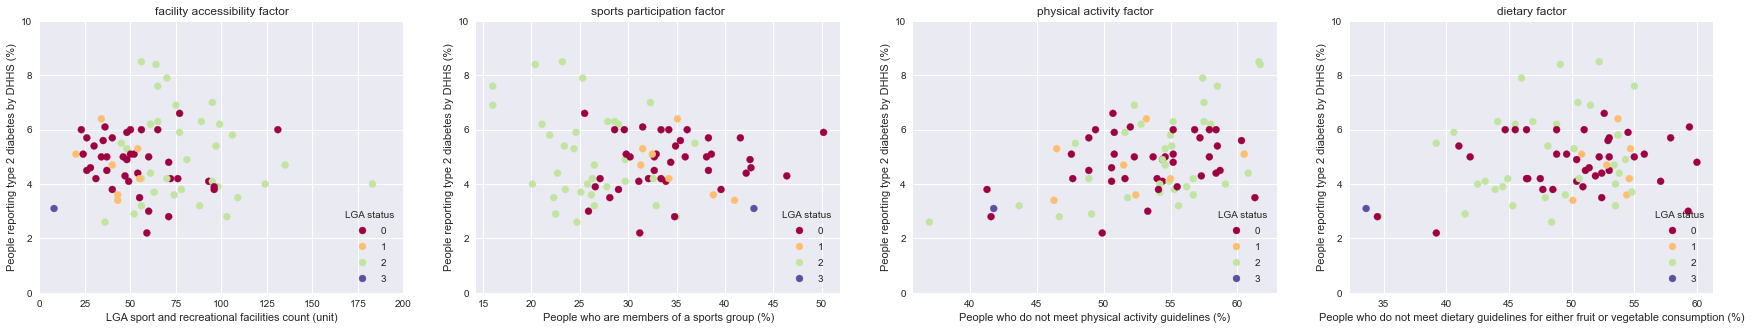

In [8]:
fig_dhhs, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

# NDSS diabetes v. facility count
scatter = ax0.scatter(
                    x=db[factor['facility']],
                    y=db[factor['ddhhs']],
                    c=db['colour'],cmap='Spectral');
ax0.set(title="facility accessibility factor",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['ddhhs']+' by DHHS (%)');
ax0.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax0.set_ylim([0,10]);
ax0.set_xlim([0,200]);

# NDSS diabetes v. sport-group participation
scatter = ax1.scatter(
                    x=db[factor['sport']],
                    y=db[factor['ddhhs']],
                    c=db['colour'],cmap='Spectral');
ax1.set(title="sports participation factor",
       xlabel=factor['sport']+' (%)',
       ylabel=factor['ddhhs']+' by DHHS (%)');
ax1.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax1.set_ylim([0,10]);

# NDSS diabetes v. sport-group participation
scatter = ax2.scatter(
                    x=db[factor['physical']],
                    y=db[factor['ddhhs']],
                    c=db['colour'],cmap='Spectral');
ax2.set(title="physical activity factor",
       xlabel=factor['physical']+' (%)',
       ylabel=factor['ddhhs']+' by DHHS (%)');
ax2.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax2.set_ylim([0,10]);

# NDSS diabetes v. dietary guidelines
scatter = ax3.scatter(
                    x=db[factor['dietary']],
                    y=db[factor['ddhhs']],
                    c=db['colour'],cmap='Spectral');
ax3.set(title="dietary factor",
       xlabel=factor['dietary']+' (%)',
       ylabel=factor['ddhhs']+' by DHHS (%)');
ax3.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax3.set_ylim([0,10]);

fig_dhhs.savefig("plot-dhhs-diabetes-4factors")

## NDSS

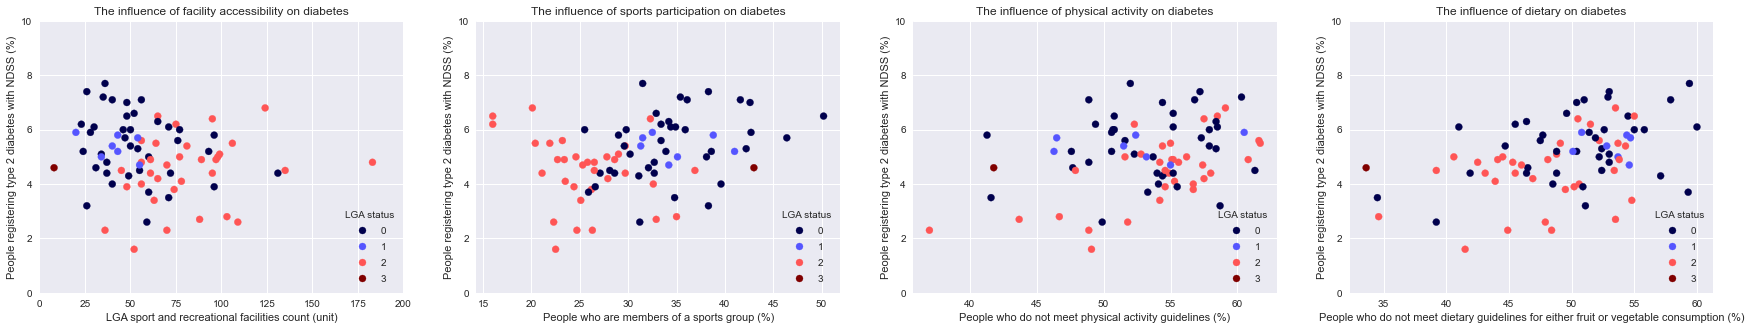

In [9]:
fig_ndss, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

# NDSS diabetes v. facility count
scatter = ax0.scatter(
                    x=db[factor['facility']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax0.set(title="The influence of facility accessibility on diabetes",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['dndss']+' (%)');
ax0.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax0.set_ylim([0,10]);
ax0.set_xlim([0,200]);

# NDSS diabetes v. sport-group participation
scatter = ax1.scatter(
                    x=db[factor['sport']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax1.set(title="The influence of sports participation on diabetes",
       xlabel=factor['sport']+' (%)',
       ylabel=factor['dndss']+' (%)');
ax1.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax1.set_ylim([0,10]);

# NDSS diabetes v. sport-group participation
scatter = ax2.scatter(
                    x=db[factor['physical']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax2.set(title="The influence of physical activity on diabetes",
       xlabel=factor['physical']+' (%)',
       ylabel=factor['dndss']+' (%)');
ax2.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax2.set_ylim([0,10]);

# NDSS diabetes v. dietary guidelines
scatter = ax3.scatter(
                    x=db[factor['dietary']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax3.set(title="The influence of dietary on diabetes",
       xlabel=factor['dietary']+' (%)',
       ylabel=factor['dndss']+' (%)');
ax3.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax3.set_ylim([0,10]);

fig_ndss.savefig("d-plot-ndss-diabetes-4factors")

## Facility Count

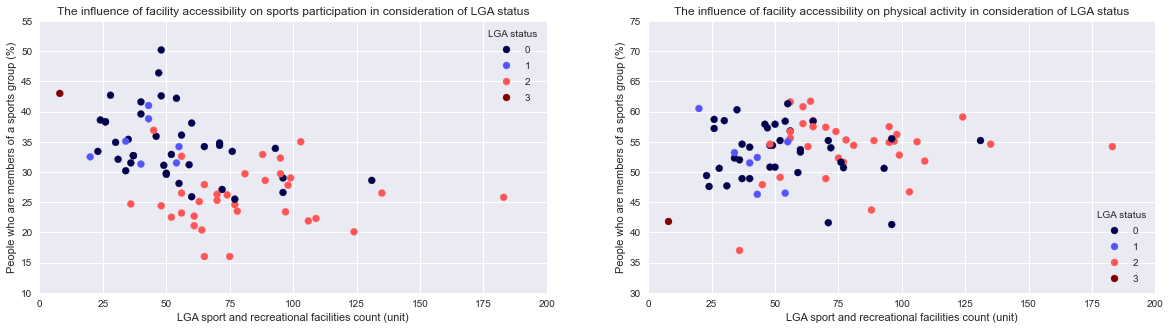

In [10]:
fig_facility, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# NDSS diabetes v. facility count
scatter = ax0.scatter(
                    x=db[factor['facility']],
                    y=db[factor['sport']],
                    c=db['colour'],cmap='seismic');
ax0.set(title="The influence of facility accessibility on sports participation in consideration of LGA status",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['sport']+' (%)');
ax0.legend(*scatter.legend_elements(), title='LGA status', loc='upper right')
ax0.set_xlim([0,200]);
ax0.set_ylim([10,55]);

# NDSS diabetes v. sport-group participation
scatter = ax1.scatter(
                    x=db[factor['facility']],
                    y=db[factor['physical']],
                    c=db['colour'],cmap='seismic');
ax1.set(title="The influence of facility accessibility on physical activity in consideration of LGA status",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['sport']+' (%)');
ax1.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax1.set_xlim([0,200]);
ax1.set_ylim([30,75]);

fig_facility.savefig("d-plot-facility-influence")